The purpose of this notebook is to run and impliment 5 machine learning models from a given data set 
- Linear Regression
- Support Vector Machine
- Decision trees
- Random Forests
- Neural Networks

In the following sections is my attempt at these processes.


### Import Data and Python Modules


Listed Below are the various python modules used to accomplish this project, all appropriate documentation can be found within the following links

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import torch
from torch import nn

In [13]:
# Function to plot predicted vs actual values
def plot_predicted_vs_actual(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.grid(True)
    plt.show()
    
   # Function to calculate MSE and R² metrics 
def evaluate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Load the dataset
df = pd.read_csv('hour_clean.csv')

# Prepare the data for training and testing
X = df.drop(['cnt', 'dteday', 'casual', 'registered', 'Unnamed: 0'], axis=1)
y = df['cnt']

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Linear Regression Model


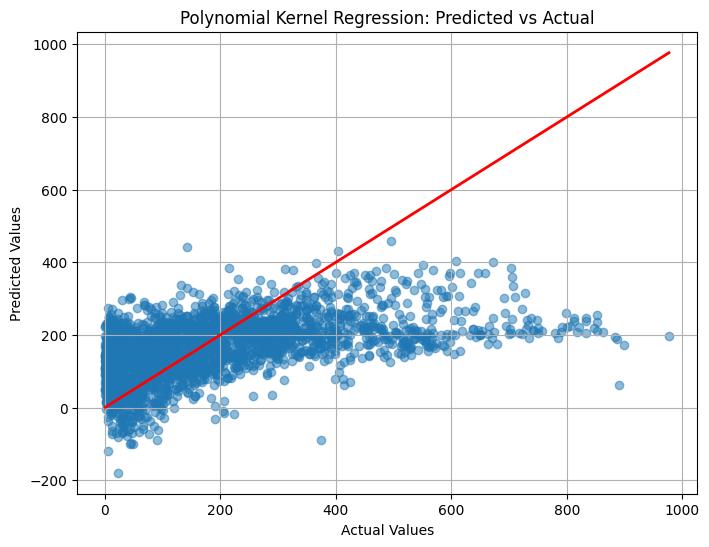

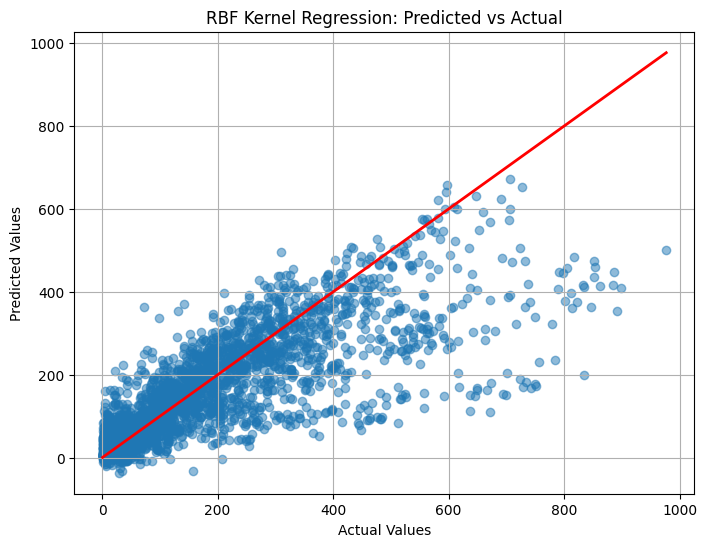

Polynomial Kernel Regression - MSE: 23094.6710, R²: 0.2503
RBF Kernel Regression - MSE: 12347.5296, R²: 0.5992


In [14]:
def polynomial_kernel_regression(X_train, y_train, X_test, degree=2):
    svr_poly = SVR(kernel='poly', degree=degree, C=100, epsilon=0.1)
    svr_poly.fit(X_train, y_train)
    y_pred_poly = svr_poly.predict(X_test)
    return y_pred_poly

def rbf_kernel_regression(X_train, y_train, X_test):
    svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
    svr_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_rbf.predict(X_test)
    return y_pred_rbf


y_pred_poly = polynomial_kernel_regression(X_train_scaled, y_train, X_test_scaled, degree=2)
y_pred_rbf = rbf_kernel_regression(X_train_scaled, y_train, X_test_scaled)

plot_predicted_vs_actual(y_test, y_pred_poly, "Polynomial Kernel Regression: Predicted vs Actual")
plot_predicted_vs_actual(y_test, y_pred_rbf, "RBF Kernel Regression: Predicted vs Actual")

mse_poly, r2_poly = evaluate_metrics(y_test, y_pred_poly)
print(f"Polynomial Kernel Regression - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")

mse_rbf, r2_rbf = evaluate_metrics(y_test, y_pred_rbf)
print(f"RBF Kernel Regression - MSE: {mse_rbf:.4f}, R²: {r2_rbf:.4f}")

### Support Vector Machine


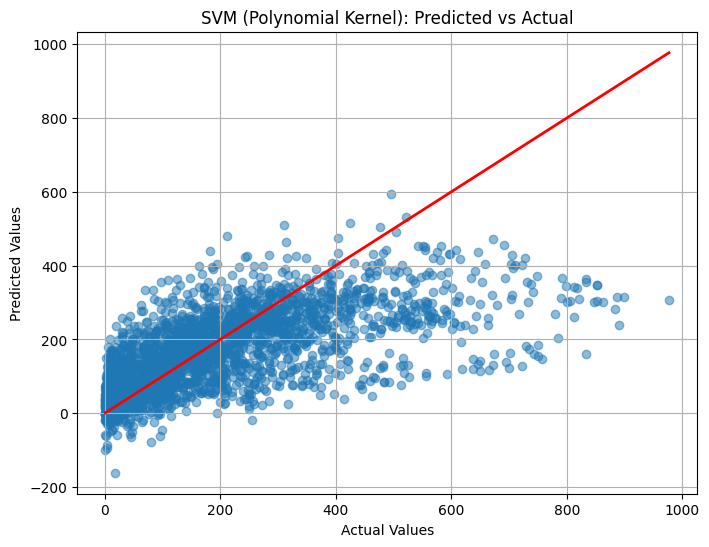

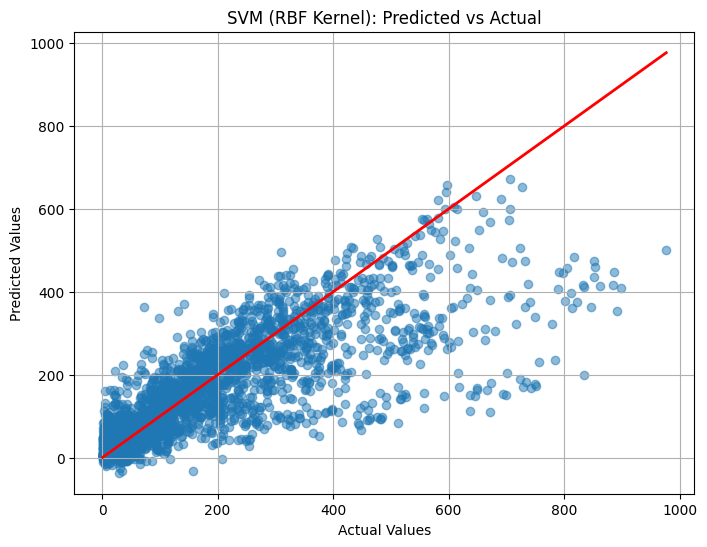

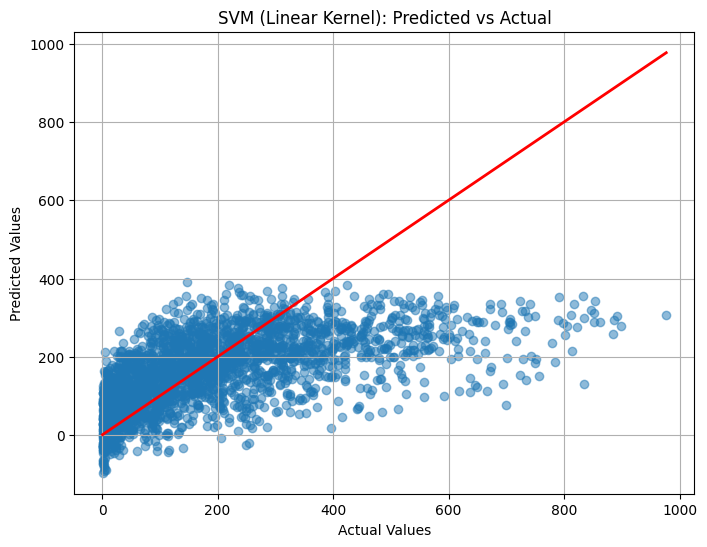

SVM (RBF Kernel) - MSE: 12347.5296, R²: 0.5992


In [15]:
def svm_polynomial_kernel(X_train, y_train, X_test, degree=3):
    svm_poly = SVR(kernel='poly', degree=degree, C=100, epsilon=0.1)
    svm_poly.fit(X_train, y_train)
    y_pred_svm_poly = svm_poly.predict(X_test)
    return y_pred_svm_poly

def svm_rbf_kernel(X_train, y_train, X_test):
    svm_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
    svm_rbf.fit(X_train, y_train)
    y_pred_svm_rbf = svm_rbf.predict(X_test)
    return y_pred_svm_rbf

def svm_linear_kernel(X_train, y_train, X_test):
    svm_linear = SVR(kernel='linear', C=100, epsilon=0.1)
    svm_linear.fit(X_train, y_train)
    y_pred_svm_linear = svm_linear.predict(X_test)
    return y_pred_svm_linear

y_pred_svm_poly = svm_polynomial_kernel(X_train_scaled, y_train, X_test_scaled, degree=3)
y_pred_svm_rbf = svm_rbf_kernel(X_train_scaled, y_train, X_test_scaled)
y_pred_svm_linear = svm_linear_kernel(X_train_scaled, y_train, X_test_scaled)

plot_predicted_vs_actual(y_test, y_pred_svm_poly, "SVM (Polynomial Kernel): Predicted vs Actual")
plot_predicted_vs_actual(y_test, y_pred_svm_rbf, "SVM (RBF Kernel): Predicted vs Actual")
plot_predicted_vs_actual(y_test, y_pred_svm_linear, "SVM (Linear Kernel): Predicted vs Actual")

mse_svm_rbf, r2_svm_rbf = evaluate_metrics(y_test, y_pred_svm_rbf)
print(f"SVM (RBF Kernel) - MSE: {mse_svm_rbf:.4f}, R²: {r2_svm_rbf:.4f}")

### Decision Trees

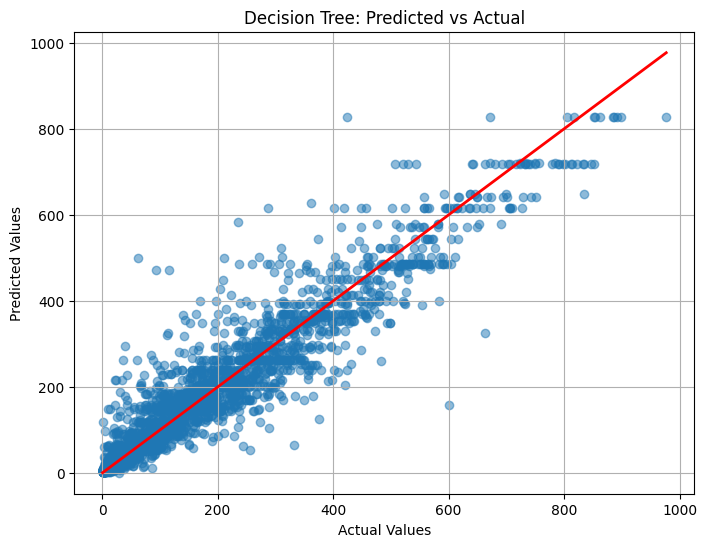

Decision Tree - MSE: 3383.0344, R²: 0.8902


In [16]:

def decision_tree_regressor(X_train, y_train, X_test, max_depth=5):
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    return y_pred_dt

y_pred_dt = decision_tree_regressor(X_train_scaled, y_train, X_test_scaled, max_depth=10)
plot_predicted_vs_actual(y_test, y_pred_dt, "Decision Tree: Predicted vs Actual")

mse_dt, r2_dt = evaluate_metrics(y_test, y_pred_dt)
print(f"Decision Tree - MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")

### Random Forests

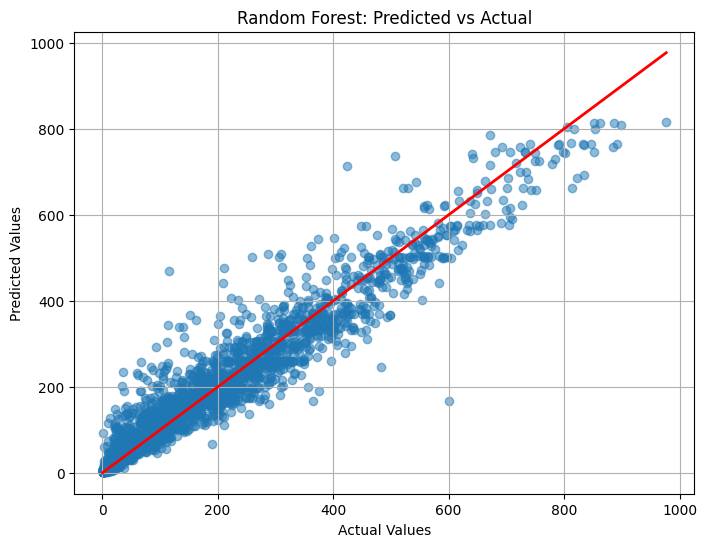

Random Forest - MSE: 2320.6243, R²: 0.9247


In [17]:
def random_forest_regressor(X_train, y_train, X_test, n_estimators=100, max_depth=10):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    return y_pred_rf

y_pred_rf = random_forest_regressor(X_train_scaled, y_train, X_test_scaled, n_estimators=100, max_depth=10)
plot_predicted_vs_actual(y_test, y_pred_rf, "Random Forest: Predicted vs Actual")
mse_rf, r2_rf = evaluate_metrics(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


### Neural Network

For the Neural Network portion, im going to be adapting my code from project 2

C:\Users\henry\AppData\Local\Temp\ipykernel_30776\3067268746.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_torch = torch.tensor(X_train, dtype=torch.float32)
C:\Users\henry\AppData\Local\Temp\ipykernel_30776\3067268746.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_torch = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
C:\Users\henry\AppData\Local\Temp\ipykernel_30776\3067268746.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_torch = torch.tensor(X_test, dtype=torch.float32)
C:\Users\henry

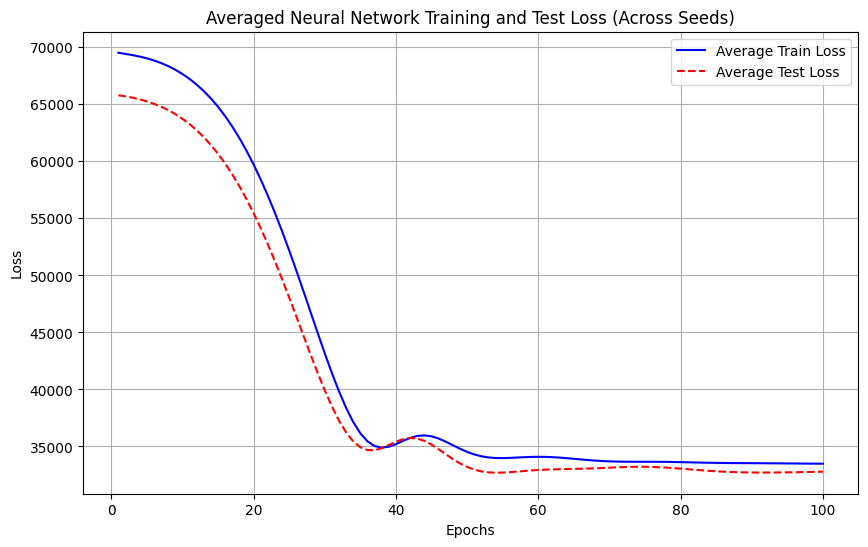

In [18]:
df = pd.read_csv('hour_clean.csv')

# Select features and target
X = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].values
y = df['cnt'].values

# Normalize data (helps with faster training)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Make y a column vector

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Neural Network Architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

# Training function with random seed support
def train_nn_with_seeds(X_train, y_train, X_test, y_test, seeds):
    results = {}
    device = "cpu"  # Force CPU for compatibility

    for seed in seeds:
        torch.manual_seed(seed)

        # Initialize model
        model_nn = SimpleNN(input_size=X_train.shape[1], output_size=1).to(device)
        loss_fn = nn.MSELoss()
        optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.01)

        # Train Neural Network
        epochs = 100
        train_losses = []
        test_losses = []

        for epoch in range(epochs):
            model_nn.train()
            optimizer.zero_grad()
            y_pred_nn = model_nn(X_train_torch.to(device))
            loss = loss_fn(y_pred_nn, y_train_torch.to(device))
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            
            # Evaluate Neural Network on test set
            model_nn.eval()
            with torch.no_grad():
                y_pred_nn_test = model_nn(X_test_torch.to(device)).cpu().numpy()
                test_loss = mean_squared_error(y_test, y_pred_nn_test)
                test_losses.append(test_loss)

        results[seed] = {
            "train_losses": train_losses,
            "test_losses": test_losses,
            "y_pred": y_pred_nn.flatten()
        }

    return results

# Generate multiple random seeds
random_seeds = np.random.randint(0, 1000, 5)  # Generate 5 different random seeds
nn_results = train_nn_with_seeds(X_train, y_train, X_test, y_test, random_seeds)

# Average the results across all seeds
avg_train_losses = np.mean([result["train_losses"] for result in nn_results.values()], axis=0)
avg_test_losses = np.mean([result["test_losses"] for result in nn_results.values()], axis=0)

# Plot the averaged Loss Curves for training and test
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), avg_train_losses, label="Average Train Loss", color='b')
plt.plot(range(1, 101), avg_test_losses, label="Average Test Loss", linestyle="--", color='r')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Averaged Neural Network Training and Test Loss (Across Seeds)")
plt.legend()
plt.grid(True)
plt.show()